In [205]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

In [206]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_9 (InputLayer)             (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D) (None, 230, 230, 3)   0                                            
____________________________________________________________________________________________________
conv1 (Conv2D)                   (None, 112, 112, 64)  9472                                         
____________________________________________________________________________________________________
bn_conv1 (BatchNormalization)    (None, 112, 112, 64)  256                                          
___________________________________________________________________________________________

In [207]:
model.layers.pop()

In [208]:
for l in model.layers:
    if l.name == 'fc21':
        l.trainable = True
    else:
        l.trainable =False
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_9 (InputLayer)             (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D) (None, 230, 230, 3)   0                                            
____________________________________________________________________________________________________
conv1 (Conv2D)                   (None, 112, 112, 64)  9472                                         
____________________________________________________________________________________________________
bn_conv1 (BatchNormalization)    (None, 112, 112, 64)  256                                          
___________________________________________________________________________________________

In [210]:
from keras.layers import Dense
from keras.models import Model
from keras.optimizers import Adam

new_layer = Dense(2, activation='softmax', name='my_dense')

inp = model.input
out = new_layer(model.layers[-1].output)

model2 = Model(inp, out)
model2.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_9 (InputLayer)             (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D) (None, 230, 230, 3)   0                                            
____________________________________________________________________________________________________
conv1 (Conv2D)                   (None, 112, 112, 64)  9472                                         
____________________________________________________________________________________________________
bn_conv1 (BatchNormalization)    (None, 112, 112, 64)  256                                          
___________________________________________________________________________________________

In [211]:
model2.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [255]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/home/ubuntu/data/dogscats/train',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        '/home/ubuntu/data/dogscats/valid',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

model2.fit_generator(
        train_generator,
        steps_per_epoch=500,
        epochs=1,
        validation_data=validation_generator,
        validation_steps=500)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/1
500/500 [==============================] - 360s - loss: 0.0887 - acc: 0.9642 - val_loss: 0.0598 - val_acc: 0.9755


In [215]:
model2.optimizer.lr = 0.01

In [116]:
# model2.save_weights('/home/ubuntu/git/learningWithKaggle/ft2_resnet98.h5')
model2.load_weights('/home/ubuntu/git/learningWithKaggle/ft2_resnet98.h5')

In [117]:
path = '/home/ubuntu/data/dogscats/test1'
import os

for filename in os.listdir(path):
    if filename.endswith(".jpg"): 
        id_file = os.path.splitext(filename)[0]
        
        continue
    else:
        continue

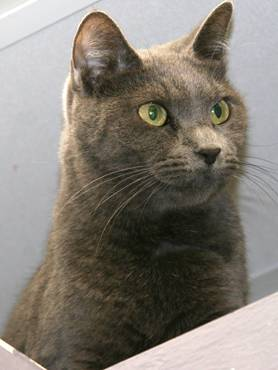

In [222]:
import glob
from IPython.display import display, Image
from keras.preprocessing import image as kimage
import skimage.io

img_path = path +'/11.jpg'
# img_path = path +'/11023.jpg'
# img_path = path +'/110.jpg'
# rand_img = np.random.choice(glob.glob(path + '/*.jpg'))

Image(filename=img_path) 


In [223]:
img = skimage.io.imread(img_path)
img.shape

(370, 278, 3)

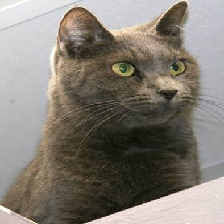

(1, 224, 224, 3)


In [224]:
img = kimage.load_img(img_path, target_size=(224, 224))
display(img)
x = kimage.img_to_array(img)
x = np.expand_dims(x, axis=0)
# x = preprocess_input(x)
print(x.shape)


In [291]:
# testing on the validation set, needs changing for the prediction on the test set as no classes
test_generator = test_datagen.flow_from_directory(
        '/home/ubuntu/data/dogscats/valid',
        target_size=(224, 224),
        batch_size=8,
        shuffle=False,
        class_mode='categorical')

Found 2000 images belonging to 2 classes.


In [292]:
preds = model2.predict_generator(test_generator,250)
files = np.array([test_generator.filenames]).T
all_preds = np.hstack((np.round(preds), files))
np.set_printoptions(threshold=np.nan)
print(all_preds)

[['1.0' '0.0' 'cats/cat.7970.jpg']
 ['1.0' '0.0' 'cats/cat.9925.jpg']
 ['1.0' '0.0' 'cats/cat.1506.jpg']
 ['1.0' '0.0' 'cats/cat.7868.jpg']
 ['1.0' '0.0' 'cats/cat.5304.jpg']
 ['1.0' '0.0' 'cats/cat.1735.jpg']
 ['1.0' '0.0' 'cats/cat.11461.jpg']
 ['1.0' '0.0' 'cats/cat.6757.jpg']
 ['1.0' '0.0' 'cats/cat.2142.jpg']
 ['1.0' '0.0' 'cats/cat.4690.jpg']
 ['0.0' '1.0' 'cats/cat.2903.jpg']
 ['1.0' '0.0' 'cats/cat.8357.jpg']
 ['1.0' '0.0' 'cats/cat.9542.jpg']
 ['1.0' '0.0' 'cats/cat.8529.jpg']
 ['1.0' '0.0' 'cats/cat.5220.jpg']
 ['1.0' '0.0' 'cats/cat.4787.jpg']
 ['1.0' '0.0' 'cats/cat.4259.jpg']
 ['1.0' '0.0' 'cats/cat.5193.jpg']
 ['1.0' '0.0' 'cats/cat.5267.jpg']
 ['1.0' '0.0' 'cats/cat.3284.jpg']
 ['1.0' '0.0' 'cats/cat.3871.jpg']
 ['1.0' '0.0' 'cats/cat.8554.jpg']
 ['1.0' '0.0' 'cats/cat.4142.jpg']
 ['1.0' '0.0' 'cats/cat.8622.jpg']
 ['1.0' '0.0' 'cats/cat.10256.jpg']
 ['1.0' '0.0' 'cats/cat.8074.jpg']
 ['1.0' '0.0' 'cats/cat.7223.jpg']
 ['1.0' '0.0' 'cats/cat.1356.jpg']
 ['1.0' '0.0' 'cat